In [2]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Reading csv file 
df = pd.read_csv("ratings_pred.csv")
df

,Unnamed: 0,Unnamed: 0.1,Review_Title,Review_Text,Ratings
0,0,0,Just wow!,Worth the money spent. Probably the best lapto...,5.0
1,1,1,Best in the market!,Laptop in Flipkart image is different imaginat...,5.0
2,2,2,Best in the market!,"Nice product,\nKeyboard is so smooth and backl...",5.0
3,3,3,Classy product,At this price this is a pretty good package......,5.0
4,4,4,Classy product,Amazing laptop. Looks sleek and works like a b...,5.0
...,...,...,...,...,...
21401,21401,21401,Utterly Disappointed,Third class plz don't buy,1.0
21402,21402,21402,Hated it!,The keyboard is very very bad quantity. All ke...,1.0
21403,21403,21403,Waste of money!,Very bad... My mouse is not working .. battery...,1.0
21404,21404,21404,Worth every penny,Great and better option in this price I love it😍😍,5.0


In [4]:
# Dropping unnecessary column
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
# Dropping unnecessary column
df.drop(columns='Unnamed: 0.1',inplace=True)

In [6]:
df

,Review_Title,Review_Text,Ratings
0,Just wow!,Worth the money spent. Probably the best lapto...,5.0
1,Best in the market!,Laptop in Flipkart image is different imaginat...,5.0
2,Best in the market!,"Nice product,\nKeyboard is so smooth and backl...",5.0
3,Classy product,At this price this is a pretty good package......,5.0
4,Classy product,Amazing laptop. Looks sleek and works like a b...,5.0
...,...,...,...
21401,Utterly Disappointed,Third class plz don't buy,1.0
21402,Hated it!,The keyboard is very very bad quantity. All ke...,1.0
21403,Waste of money!,Very bad... My mouse is not working .. battery...,1.0
21404,Worth every penny,Great and better option in this price I love it😍😍,5.0


In [7]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21406 entries, 0 to 21405
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Review_Title  21404 non-null  object 
 1   Review_Text   21404 non-null  object 
 2   Ratings       21404 non-null  float64
dtypes: float64(1), object(2)
memory usage: 501.8+ KB


In [8]:
df.isnull().sum()

Review_Title    2
Review_Text     2
Ratings         2
dtype: int64

<AxesSubplot:>

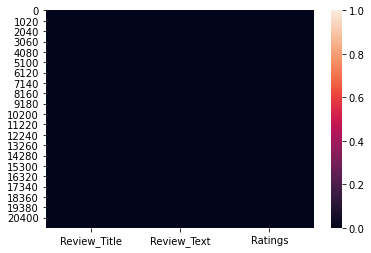

In [9]:
sns.heatmap(df.isnull())

In [ ]:
# Replacing nan values using imputation method

In [10]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Wonderful
dtype: object

In [11]:
#Checking the mode of Review_Text column
df["Review_Text"].mode()

0    Good
dtype: object

In [12]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5.0    13167
4.0     4118
1.0     2175
3.0     1347
2.0      597
Name: Ratings, dtype: int64

In [13]:
#Checking the mode
df["Ratings"].mode()

0    5.0
dtype: float64

In [14]:
#Replacing naa values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [15]:
df.isnull().sum()

Review_Title    0
Review_Text     0
Ratings         0
dtype: int64

In [16]:
# Checking the unique value count of target column
df['Ratings'].unique()

array([5., 4., 1., 3., 2.])

In [17]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0',1)
df['Ratings'] = df['Ratings'].replace('2.0',2)
df['Ratings'] = df['Ratings'].replace('3.0',3)
df['Ratings'] = df['Ratings'].replace('4.0',4)
df['Ratings'] = df['Ratings'].replace('5.0',5)
df['Ratings'] = df['Ratings'].astype('int')

In [18]:
# Checking the unique value count of target column again
df['Ratings'].unique()

array([5, 4, 1, 3, 2])

In [19]:
# Combining Review text and title
df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [20]:
df

,Review_Title,Review_Text,Ratings,Review
0,Just wow!,Worth the money spent. Probably the best lapto...,5,Just wow! Worth the money spent. Probably the ...
1,Best in the market!,Laptop in Flipkart image is different imaginat...,5,Best in the market! Laptop in Flipkart image i...
2,Best in the market!,"Nice product,\nKeyboard is so smooth and backl...",5,"Best in the market! Nice product,\nKeyboard is..."
3,Classy product,At this price this is a pretty good package......,5,Classy product At this price this is a pretty ...
4,Classy product,Amazing laptop. Looks sleek and works like a b...,5,Classy product Amazing laptop. Looks sleek and...
...,...,...,...,...
21401,Utterly Disappointed,Third class plz don't buy,1,Utterly Disappointed Third class plz don't buy
21402,Hated it!,The keyboard is very very bad quantity. All ke...,1,Hated it! The keyboard is very very bad quanti...
21403,Waste of money!,Very bad... My mouse is not working .. battery...,1,Waste of money! Very bad... My mouse is not wo...
21404,Worth every penny,Great and better option in this price I love it😍😍,5,Worth every penny Great and better option in t...


In [21]:
# Dropping unnecessary column
df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

In [22]:
# Checking data of first row in Review column
df['Review'][0]

'Just wow! Worth the money spent. Probably the best laptop series in Indian market with RTX processors. I can smoothly run anything released a of now.'

In [23]:
# Checking data of first row in Review column
df['Review'][1]

"Best in the market! Laptop in Flipkart image is different imagination but in reality it's better than imagination. I loved it true. It's true from company product at this price. In picture display feels it not good but display in reality is much nice and good."

In [ ]:
#Text Processing

In [24]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text


In [25]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('[\n!]',' ')

In [ ]:
#Let's have a look into our text again

In [26]:
df['Review'][0]

'just wow worth the money spent probably the best laptop series in indian market with rtx processors i can smoothly run anything released a of now'

In [27]:
df['Review'][1]

'best in the market laptop in flipkart image is different imagination but in reality it is better than imagination i loved it true it is true from company product at this price in picture display feels it not good but display in reality is much nice and good'

In [ ]:
#Removing StopWords

In [28]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
#Lemmatization

In [29]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [30]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [31]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [33]:
#df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [ ]:
#Text Normalization - Standardization

In [34]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [35]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [ ]:
# Now We did all the text-processing steps and got required input for our model. We will get into Visualization part now

In [37]:
#Visualization:
 # Word Counts:
# Creating column for word counts in the text

df['WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['WordCount','Review']].head()

,WordCount,Review
0,16,wow worth money spent probably best laptop ser...
1,25,best market laptop flipkart image different im...
2,18,best market nice product keyboard smooth backl...
3,59,classy product price pretty good packagethat r...
4,9,classy product amazing laptop looks sleek work...


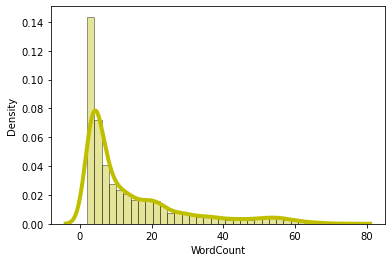

In [38]:
# density plot and histogram of Review word count
sns.distplot(df['WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [39]:
# Character count
# Creating column for character counts in the text
df['ChaCount'] = df['Review'].str.len()
df[['ChaCount','Review']].head()

,ChaCount,Review
0,109,wow worth money spent probably best laptop ser...
1,178,best market laptop flipkart image different im...
2,136,best market nice product keyboard smooth backl...
3,355,classy product price pretty good packagethat r...
4,58,classy product amazing laptop looks sleek work...


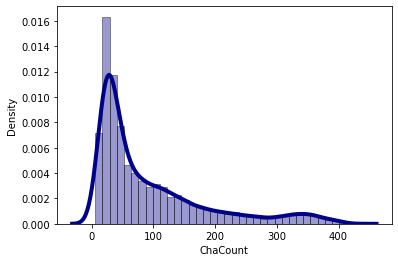

In [40]:
# density plot and histogram of all character count
sns.distplot(df['ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [41]:
df.shape

(21406, 5)

In [42]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(21012, 5)

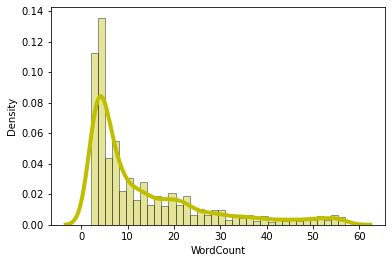

In [43]:
# density plot and histogram of Review word count
sns.distplot(df['WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [45]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['ChaCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(20633, 5)

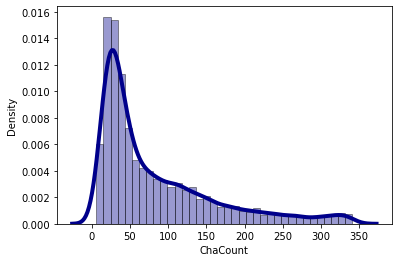

In [46]:
# density plot and histogram of all character count
sns.distplot(df['ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [ ]:
#Top 30 most frequently occuring words

In [47]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

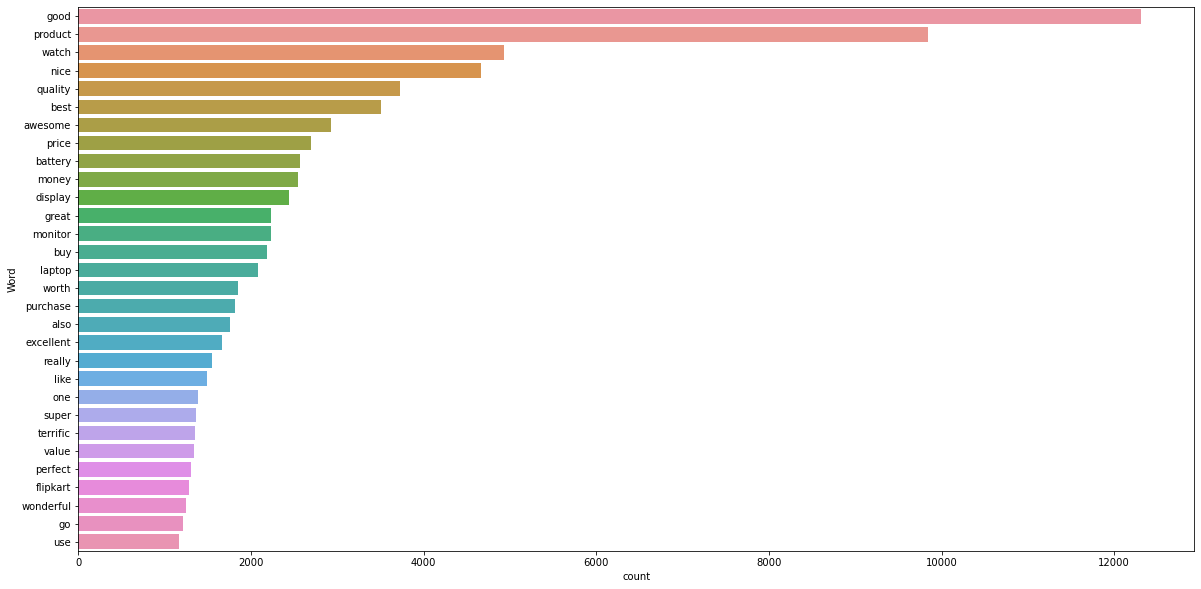

In [48]:
freq_words(df['Review'])

In [ ]:
#By seeing the above plot we can see that Good, prodout, quality......are occurring frequently

In [49]:
#Top 30 Rare words
#function to plot least frequent terms

def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    
    #selecting top 30 most freq words
    
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

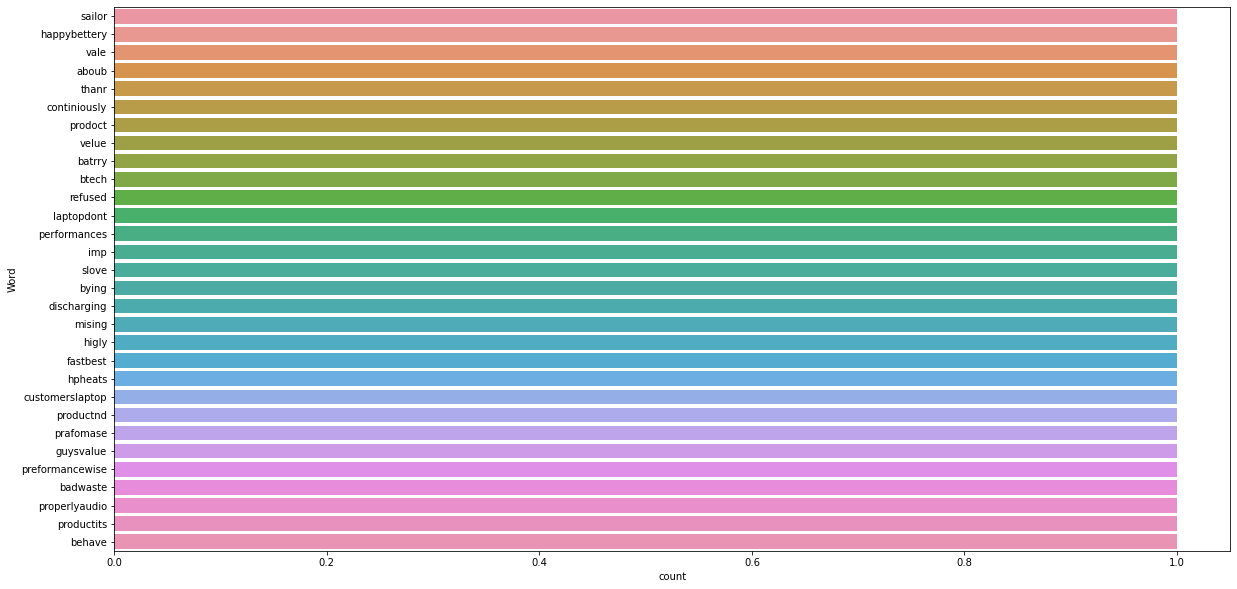

In [50]:
rare_words(df['Review'])

In [ ]:
#Above list of words are have rare occurance in Review

In [51]:
# Word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

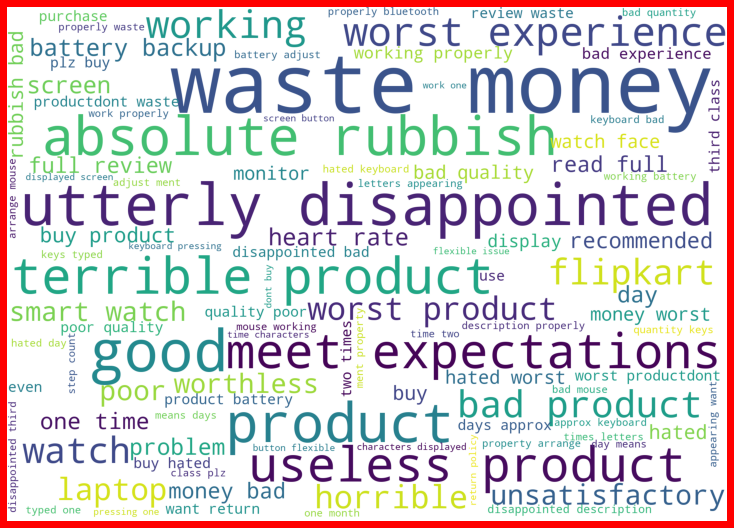

In [52]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

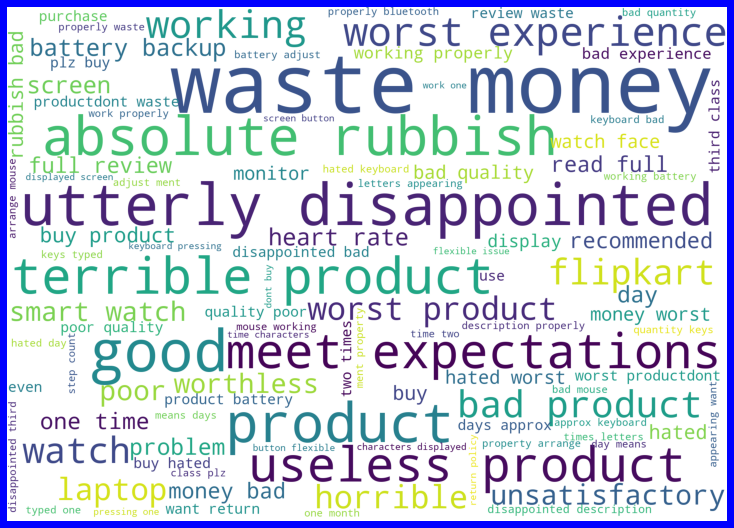

In [53]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

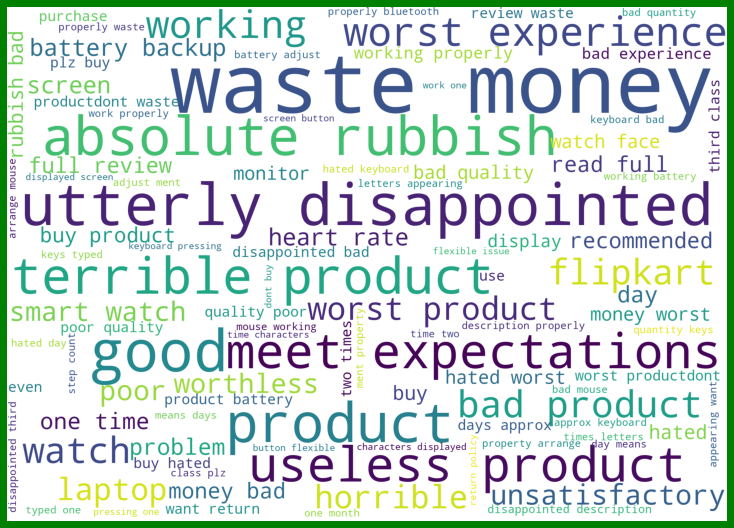

In [54]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

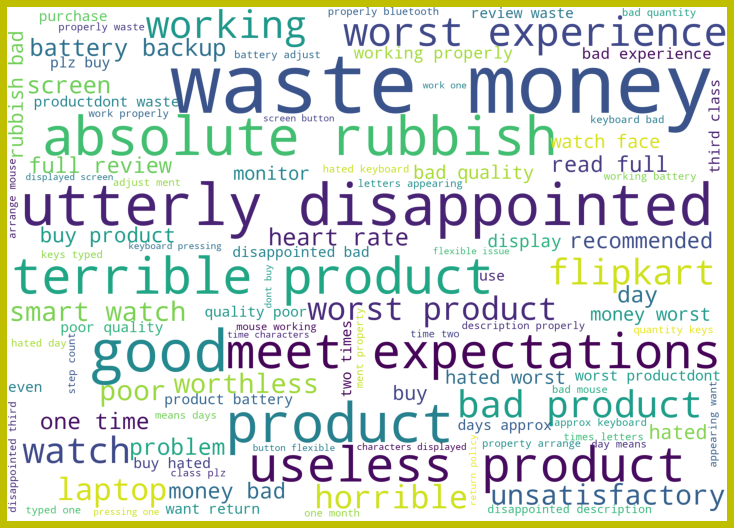

In [55]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

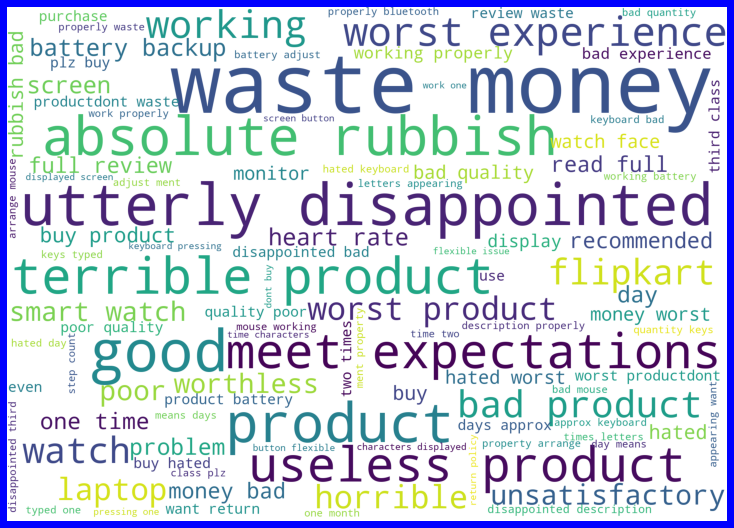

In [56]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [57]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    12702
4     3903
1     2154
3     1301
2      573
Name: Ratings, dtype: int64

In [58]:
#Model Building and Evaluation: 

# Separating feature and label

x = df['Review']
y = df['Ratings']

In [ ]:
# Converting text data into vectors using Tfidf Vectorizer

In [59]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [60]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [61]:
#I will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

In [62]:
#Splitting the data into train and test
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

In [ ]:
#Data Balancing

In [63]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (15474, 150000)
x_test (5159, 150000)
y_train (15474,)
y_test (5159,)


In [64]:
#Checking the value counts of Ratings column
y.value_counts()

5    12702
4     3903
1     2154
3     1301
2      573
Name: Ratings, dtype: int64

In [65]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 9518, 4: 2925, 1: 1638, 3: 969, 2: 424})


In [67]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 9518, 2: 9518, 3: 9518, 4: 9518, 5: 9518})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 9518, 4: 2925, 1: 1638, 3: 969, 2: 424})
The number of classes after fit Counter({5: 9518, 4: 9518, 3: 9518, 2: 9518, 1: 9518})


In [69]:
# Importing libraries for ML Algorithms

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
xgb = XGBClassifier(verbosity=0)
sgd = SGDClassifier()

In [71]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [72]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf,xgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 97.69335142469471
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99       516
           2       0.99      0.94      0.96       149
           3       0.96      0.91      0.94       332
           4       0.95      0.96      0.95       978
           5       0.99      0.99      0.99      3184

    accuracy                           0.98      5159
   macro avg       0.97      0.96      0.97      5159
weighted avg       0.98      0.98      0.98      5159

Confusion Matrix : 
 [[ 511    1    2    0    2]
 [   2  140    1    3    3]
 [   5    1  303   13   10]
 [   0    0    7  942   29]
 [   1    0    2   37 3144]]

******************************LinearSVC******************************
Accuracy Score: 97.77088583058733
---------------------------------------------------
C

In [ ]:
#I have created 6 different classification algorithms.Among all these algorithms all are giving good accuracies

In [73]:
#Cross validation score

# Defning function cross_val to find cv score of models

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

In [74]:
for model in [lr,svc,DTC,sgd,rf,xgb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score : 92.56039770199325
******************************LinearSVC******************************
Cross validation score : 94.30035590270327
******************************DecisionTreeClassifier******************************
Cross validation score : 91.1936402996087
******************************SGDClassifier******************************
Cross validation score : 94.45060324093828
******************************RandomForestClassifier******************************
Cross validation score : 92.56524054845433
******************************XGBClassifier******************************
Cross validation score : 96.1759997803524


In [ ]:
#    All our algorithms are giving good cv scores.Among these algorithms I am selecting SGD Classifier as best
#    fitting algorithm for our final model as it is giving least difference between accuracy and cv score.

In [75]:
#HyperParameter Tuning

# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [76]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sgd, grid_params, cv = 3, verbose=10)
GCV.fit(x_train_ns,y_train_ns)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 1/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.991 total time=   1.3s
[CV 2/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 2/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.993 total time=   1.1s
[CV 3/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 3/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.994 total time=   1.2s
[CV 1/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 1/3; 2/12] END loss=hinge, n_jobs=-1, penalty=l1;, score=0.966 total time=   2.1s
[CV 2/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 2/3; 2/12] END loss=hinge, n_jobs=-1, penalty=l1;, score=0.978 total time=   2.0s
[CV 3/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 3/3; 2/12] END loss

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'squared_hinge'], 'n_jobs': [-1, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=10)

In [77]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

{'loss': 'hinge', 'n_jobs': 1, 'penalty': 'l2'}

In [ ]:
# Final Model

In [79]:
# Training our final model with above best parameters
model = SGDClassifier(loss = 'hinge', n_jobs = 1, penalty = 'l2')
model.fit(x_train_ns,y_train_ns)   # fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score : 97.51889901143632

Confusion Matrix : 
 [[ 512    0    2    0    2]
 [   2  140    1    3    3]
 [   4    3  302   15    8]
 [   0    0    6  940   32]
 [   0    0    0   47 3137]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       516
           2       0.98      0.94      0.96       149
           3       0.97      0.91      0.94       332
           4       0.94      0.96      0.95       978
           5       0.99      0.99      0.99      3184

    accuracy                           0.98      5159
   macro avg       0.97      0.96      0.96      5159
weighted avg       0.98      0.98      0.98      5159



In [80]:
# Model Saving:
import joblib
joblib.dump(model,"Ratings_Prediction.pkl")

['Ratings_Prediction.pkl']